## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

# Root directory of the project
ROOT_DIR = os.path.abspath("../../../")
print("ROOT_DIR: ", ROOT_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.modeldepth as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Path to Shapes trained weights
MODEL_PATH = os.path.join("/data/Akeaveny/Datasets/part-affordance_combined/weights/hammer/affordance20200727T1851/mask_rcnn_affordance_0020.h5")

/home/akeaveny/anaconda3/envs/tensorflow115/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akeaveny/anaconda3/envs/tensorflow115/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akeaveny/anaconda3/envs/tensorflow115/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/akeaveny/anac

ROOT_DIR:  /home/akeaveny/catkin_ws/src/object-rpe-ak/Mask_RCNN


## Configurations

In [2]:
# MS COCO Dataset
import objects.dataset_syn_hammer as Affordance
config = Affordance.AffordanceConfig()

ROOT_DIR:  /home/akeaveny/catkin_ws/src/object-rpe-ak/Mask_RCNN/samples


## Notebook Preferences

In [3]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

In [4]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [5]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
    
weights_path = MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /data/Akeaveny/Datasets/part-affordance_combined/weights/hammer/affordance20200727T1851/mask_rcnn_affordance_0020.h5


## Review Weight Stats

In [6]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1/kernel:0,"(7, 7, 3, 64)",-0.8617,+0.8453,+0.1314
conv1/bias:0,"(64,)",-0.0002,+0.0004,+0.0001
bn_conv1/gamma:0,"(64,)",+0.0835,+2.6406,+0.5090
bn_conv1/beta:0,"(64,)",-2.3931,+5.3611,+1.9781
conv1_depth/kernel:0,"(64,)",-173.0470,+116.3013,+44.5654
conv1_depth/bias:0*** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a/kernel:0,"(7, 7, 3, 64)",-0.0427,+0.0427,+0.0248
res2a_branch2a/bias:0,"(64,)",-0.0000,+0.0000,+0.0000
bn_conv1_depth/gamma:0,"(1, 1, 64, 64)",-0.6575,+0.3180,+0.0764
bn_conv1_depth/beta:0,"(64,)",-0.0022,+0.0082,+0.0018


# Histograms of Weights

TODO: cleanup this part

224


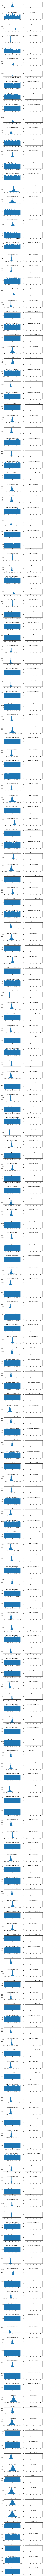

In [7]:
layers = []
for layer in model.keras_model.layers:
    if layer.get_weights():
        for layer_ in layer.layers:
            layers.append(layer_)

# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
print(len(layers))

# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)